Use the starter notebook and write code to help you: 
1. Specify an ML model that can understand both images and text into Weaviate
2. Add the provided data to your vector database - feel free to use your own images for this aswell!
3. Search the data with a text query
4. Search the data with an image query.

In [1]:
import pickle, weaviate, json, os, IPython

### We first need to start a local instance of Weaviate using Docker.

1. This can be done by opening up a terminal in the folder with the provided `docker-compose.yml` file in it and typing:
```bash
docker compose up
```

2. Later, in order to bring Weaviate down you can just go into this terminal window and type `Ctrl + C`

In [2]:
#Connect to locally hosted Weaviate and check if everything is ready

client = weaviate.Client("http://localhost:8080")

print(f"Client created? {client.is_ready()}")

Client created? True


### Q1: Specify an ML model that can understand both images and text into Weaviate

In [5]:
#Delete the schema if it alredy exists
if client.schema.exists("TextImageSearch"):
    client.schema.delete_class("TextImageSearch")

In [6]:
#To do this we need to specify a schema in which we can specify the model to be used
# aswell as the properties. 

class_obj = {
    'class':"TextImageSearch",
    'moduleConfig' :{
        'multi2vec-clip':{"imageFields":['image']}
    },
    
    'vectorizer': 'multi2vec-clip',
    
    'properties' : [{'name': "text", "dataType": ['string']},
                   {'name': 'image', "dataType": ['blob']}
                   ]
}

client.schema.create_class(class_obj)
print("Schema class created")

Schema class created


### Q2: Add the provided data to your vector database - feel free to use your own images for this aswell!

In [7]:
# Here we will pass in a larger dataset into a folder called "Images"

#If you'd like to add your own images to the vector database to search over
# feel free to add them into this folder aswell!

for img in os.listdir("Images/"):
    
    print(f"Adding image: {img}")
    
    encoded_image = weaviate.util.image_encoder_b64(f'Images/{img}')
    
    data_properties = {
        'image': encoded_image,
        'text' : img
    }
    
    client.data_object.create(data_properties, class_name="TextImageSearch")
    
print("All images added!")

Adding image: Llama_LIL_134178.jpg
Adding image: Clouds in a blue sky_LIL_134208.jpg
Adding image: Dirt path along a coast_LIL_134176.jpg
Adding image: Armchair and curtains_LIL_134205.jpg
Adding image: Silhouetted palm tree _LIL_134224.jpg
Adding image: Flying kites_LIL_134197.jpg
Adding image: Walking in urban setting_LIL_134192.jpg
Adding image: Palm tree_LIL_134189.jpg
Adding image: Colorful sunset_LIL_134216.jpg
Adding image: Birds on utility lines_LIL_134174.jpg
Adding image: Chairs and lockers_LIL_134219.jpg
Adding image: Flowering plant _LIL_134193.jpg
Adding image: Microphone_LIL_134215.jpg
Adding image: Wearing high heels_LIL_134168.jpg
Adding image: Cat outside_LIL_134200.jpg
Adding image: On a grassy hill_LIL_134221.jpg
Adding image: Looking down_LIL_134185.jpg
Adding image: Toy plush sheep_LIL_134214.jpg
Adding image: Chatting in urban scene_LIL_134183.jpg
Adding image: Vintage stockings_LIL_134213.jpg
Adding image: Riding a horse_LIL_134223.jpg
Adding image: Onlookers con

### Q3. Search the data with a text query

In [12]:
res = (
    client.query
    .get("TextImageSearch", ['text', '_additional {distance}'])
    .with_near_text({'concepts':['cute cats outdoors']})
    .with_limit(3)
    .do()
)

print(json.dumps(res,indent=2))

{
  "data": {
    "Get": {
      "TextImageSearch": [
        {
          "_additional": {
            "distance": 0.72321254
          },
          "text": "Cat outside_LIL_134200.jpg"
        },
        {
          "_additional": {
            "distance": 0.73600066
          },
          "text": "Cat inside_LIL_134199.jpg"
        },
        {
          "_additional": {
            "distance": 0.7545897
          },
          "text": "Cat_LIL_134209.jpg"
        }
      ]
    }
  }
}


**Visualize some of the returned images:**

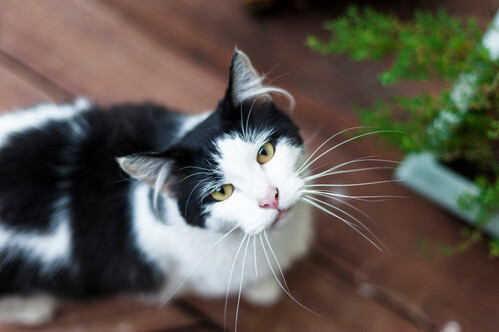

In [13]:
IPython.display.Image(filename='Images/Cat outside_LIL_134200.jpg', width=300)

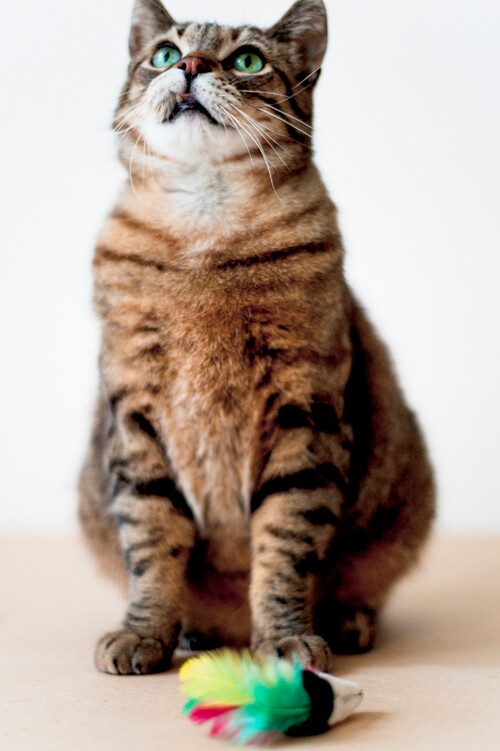

In [10]:
IPython.display.Image(filename='Images/Cat_LIL_134209.jpg', width=300)

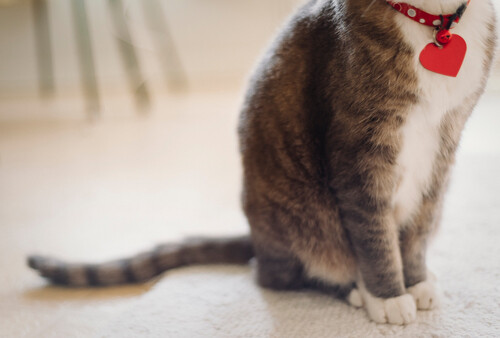

In [11]:
IPython.display.Image(filename='Images/Cat_LIL_134210.jpg', width=300)

### Feel free to perform more searches and see if you can explain why specific text search queries return images! 

#### You've sucessfully used a vector database to build text-to-image search!

### Q4. Search the data with an image query.

- **Here we will pass in images that are not in the vector database and search for the most similar images as determined by vector search** 

- **These images can be found in the `TestImages` folder. Feel free to provide your own images as search queries here aswell!**

#### First visualize the image you want to query the database with:

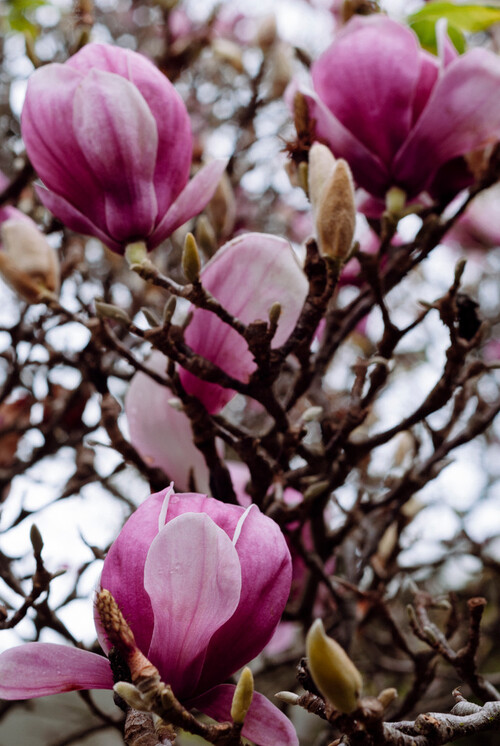

In [14]:
IPython.display.Image(filename='TestImages/Flowering plant_LIL_134188.jpg', width=300) 

#### Now let's write a query to search using this image:

In [16]:
imres = (client.query
         .get('TextImageSearch', ['text', '_additional {distance}'])
         .with_near_image({'image' : 'TestImages/Flowering plant_LIL_134188.jpg'})
         .with_limit(3)
         .do()
)

print(json.dumps(imres,indent=2))

{
  "data": {
    "Get": {
      "TextImageSearch": [
        {
          "_additional": {
            "distance": 0.09187275
          },
          "text": "Flowering plant_LIL_134187.jpg"
        },
        {
          "_additional": {
            "distance": 0.09301871
          },
          "text": "Flowering plant _LIL_134193.jpg"
        },
        {
          "_additional": {
            "distance": 0.22599983
          },
          "text": "Red berries_LIL_134169.jpg"
        }
      ]
    }
  }
}


**Visualize the images most similar to the input image**

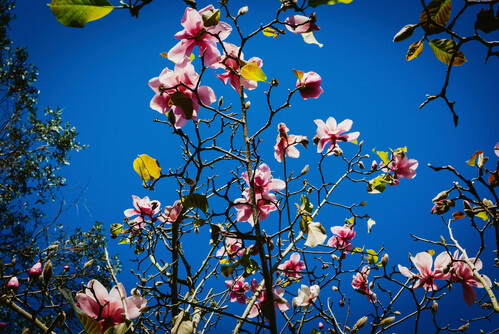

In [17]:
IPython.display.Image(filename='Images/Flowering plant_LIL_134187.jpg', width=300)

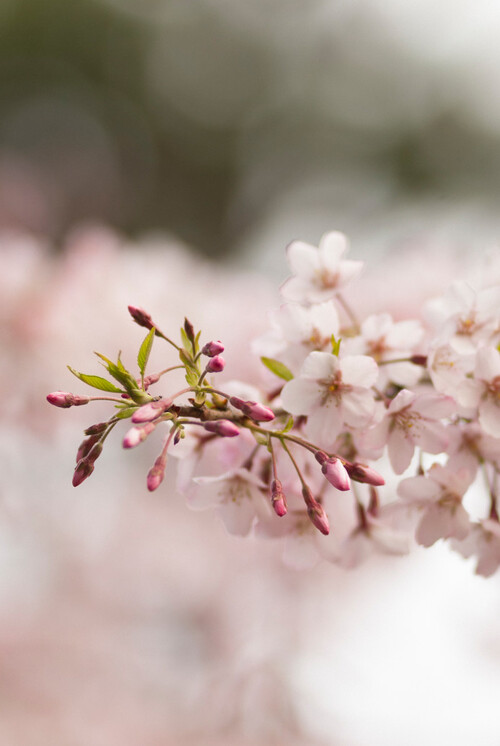

In [18]:
IPython.display.Image(filename='Images/Flowering plant _LIL_134193.jpg', width=300)

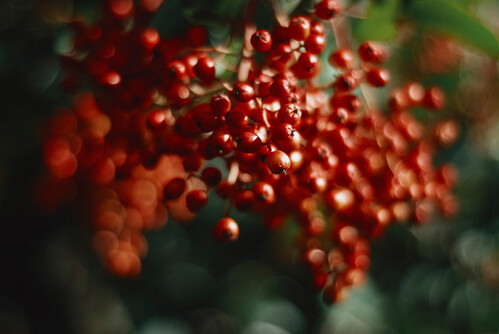

In [19]:
IPython.display.Image(filename='Images/Red berries_LIL_134169.jpg', width=300)